In [12]:
# P.13: Burger's Equation
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#* Select numerical parameters (time step, grid spacing, etc.).
N = 30      # Number of grid spaces
M = 15       # Desired number of plots for each time step moving forward
L = 10      # System size
h = L/N     # Grid spacing delta_x
kappa = 1   # Diffusion coefficient
tau = .005 # Time Step (delta_t)
coeff = kappa*tau/(2*h**2)    # Cofficient to simplify advection scheme

In [14]:

# Create initial wave vector "a" with N+1 spaces
# A j+1 index will need to be fit into scheme
a = np.zeros(N)

#Initial conditions for wave are set
#1 for x < 0
#-1 for x > 0
for i in range(N) :
    xi = i*h - L/2. #formula for each x-coordinate
    if xi < 0:
        a[i] = 1 
    elif xi > 0:
        a[i] = -1
    else:
        a[i] = 0

#x-coordinates to be plotted in a(x,t) eq.
x = np.arange(N)*h-L/2

#Initialize plotting variables.

D = np.zeros(N)   # D_j vector in scheme
aplot = np.zeros((N,M)) # Wave matrix to be created
tplot = np.zeros(M)  # Time vector
aplot[:,0] = np.copy(a)     # Adds initial state "a" to first column of aplot

In [18]:
# Iterate i through time and j through space
for i in range(1,N-1):
    
    for j in range(M-1):
        
        #D_j vector formula 
        D[i] = (aplot[i+1,j] - aplot[i-1,j])/(2*h)
        
        #Wave vector to get each step in time
        aplot[i,j+1] = aplot[i,j] - D[i]*aplot[i,j]*tau + \
        coeff*(aplot[i+1,j] + aplot[i-1,j] - 2*aplot[i,j] + \
               aplot[i+1,j+1] + aplot[i-1,j+1] - 2*aplot[i,j+1])
        #Boundary conditions, 1 and -1 at -L/2 and L/2 endpoints for all t.
        aplot[0,:] = 1
        aplot[N-1,:] = -1
    #Record time
        if i >= 2:
            continue
        tplot[j-1] = tau*(j)

       
print(aplot)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 1.          1.0225      1.02915625  1.03356067  1.03593227  1.03648902
   1.03543233  1.03294824  1.02920864  1.02437225  1.01858558  1.01198374
   1.00469126  0.99682279  0.98848371]
 [ 1.          1.02300625  1.03097841  1.03890825  1.04659912  1.0538828
   1.0606175   1.06668526  1.07198958  1.07645322  1.08001631  1.08263453
   1.0842775   1.08492728  1.084577  ]
 [ 1.          1.02301764  1.03104565  1.03919243  1.04744395  1.05577357
   1.06414442  1.07251168  1.08082445  1.08902747  1.09706257  1.10486996
   1.11238934  1.11956087  1.12632597]
 [ 1.          1.0230179   1.03104776  1.03920387  1.04748833  1.05590193
   1.06444345  1.07310915  1.08189239  1.09078343  1.09976923  1.10883348
   1.11795659  1.12711583  1.13628549]
 [ 1.          1.0230179   1.03104782  1.03920427  1.04749024  1.05590869
   1.064

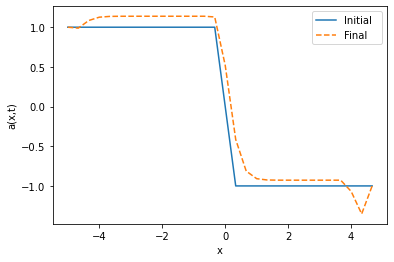

In [19]:
#* Plot the initial and final states.
plt.plot(x,aplot[:,0],'-',x,aplot[:,M-1],'--');
plt.legend(['Initial  ','Final'])
plt.xlabel('x')  
plt.ylabel('a(x,t)')
plt.show()

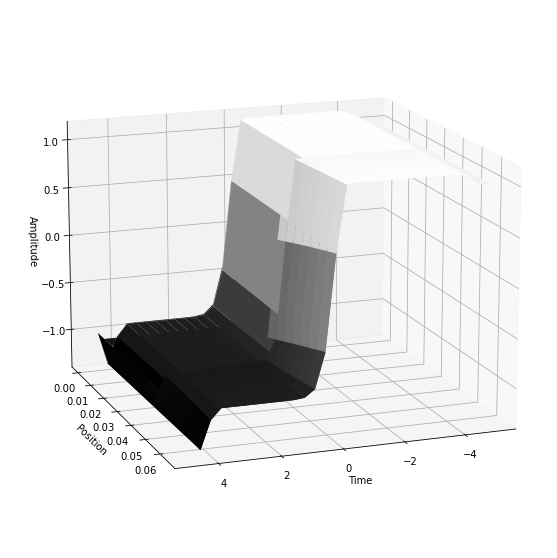

In [20]:
#* Plot the wave amplitude versus position and time
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection = '3d')
X,T = np.meshgrid(x,tplot)
ax.plot_surface(X,T,np.transpose(aplot), rstride=1, cstride=1,cmap=cm.gray)
ax.view_init(elev=15., azim=70)
ax.set_ylabel('Position') 
ax.set_xlabel('Time')
ax.set_zlabel('Amplitude')
plt.show()


In [26]:
#Part 2: Plotting Analytical Solution

import numpy as np
#import scipy.special for erf() use
from scipy import special 

#Define analytic solution
def F(x,t):
    return 0.5*np.e**(t-x)*(1-special.erf((x-2*t)/(2*np.sqrt(t))))

def a(x,t):
    return kappa*((F(x,t)-F(-x,t))/(F(x,t)+F(-x,t)))

#Create wave matrix "amp"
N = 100
M = 100
amp = np.zeros((N,M))
x = np.linspace(-.5,.5,N)
t = np.linspace(0,.1,M)

#Set k and l as counters for integer indices
#i and j are non-integers in linspace of x and t; cannot be index values
k = 0
l = 0
 
for i in x:
    l += 1
    if i == x[0]:
        l = 0
    if l == M:
        l = 0
    for j in t:
        if k == N:
            k = 0
            
        amp[0,:] = 1
        amp[N-1,:] = -1  
        
        #Record a(i,j) values into wave matrix
        amp[k,l] = a(i,j)
        
        k += 1
         
        
print(amp)

<ipython-input-26-bd096fbee164>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5*np.e**(t-x)*(1-special.erf((x-2*t)/(2*np.sqrt(t))))


[[ 1.          1.          1.         ... -1.         -1.
  -1.        ]
 [ 1.          1.          1.         ... -1.         -1.
  -1.        ]
 [ 1.          1.          1.         ... -1.         -1.
  -1.        ]
 ...
 [ 0.82464579  0.81613229  0.80729829 ... -0.80729829 -0.81613229
  -0.82464579]
 [ 0.82292323  0.81438245  0.80552258 ... -0.80552258 -0.81438245
  -0.82292323]
 [ 0.82121507  0.81264772  0.80376266 ... -0.80376266 -0.81264772
  -0.82121507]]


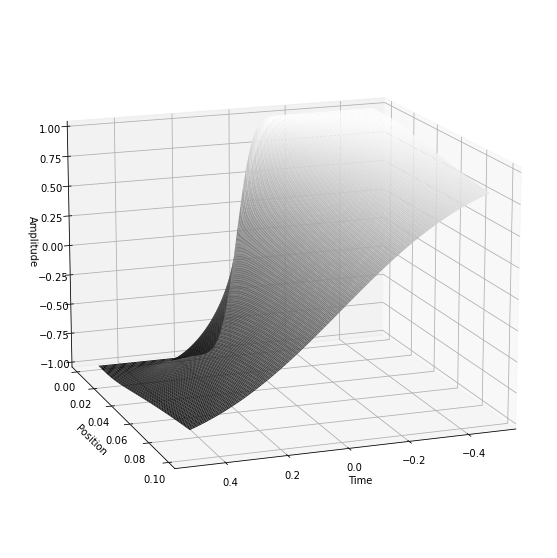

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection = '3d')

#Truncate first and last values to remove glitching
X,T = np.meshgrid(x[1:N-1],t[1:M-1]) 
ax.plot_surface(X,T, amp[1:N-1,1:M-1], rstride=1, cstride=1, cmap=cm.gray)
ax.view_init(elev=15., azim=70)
ax.set_ylabel('Position') 
ax.set_xlabel('Time')
ax.set_zlabel('Amplitude')
plt.show()